In [24]:
import scanpy as sc
import numpy as np
import pandas as pd

In [25]:
from liana.method.sp._Misty import MistyData
from liana.method.sp._misty_constructs import genericMistyData, lrMistyData

In [26]:
import plotnine as p9

In [27]:
adata = sc.read_h5ad('liana/tests/data/synthetic.h5ad')

In [28]:
misty = genericMistyData(intra=adata, bandwidth=10, cutoff=0, add_juxta=False, set_diag=False)

/home/dbdimitrov/anaconda3/envs/liana-py/lib/python3.10/site-packages/mudata/_core/mudata.py:457: UserWarning: Cannot join columns with the same name because var_names are intersecting.


In [29]:
misty(seed = 42)

In [8]:
def plot_Rsq(misty, stat, return_fig=True):
    target_metrics = misty.uns['target_metrics'].copy()
    
    # get order of target by decreasing intra.R2
    targets = target_metrics.sort_values(by=stat, ascending=False)['target'].values
    # targets as categorical variable
    target_metrics['target'] = pd.Categorical(target_metrics['target'], categories=targets, ordered=True)
    
    # importances plot
    p = (p9.ggplot(target_metrics, p9.aes(x='target', y=stat)) +
         p9.geom_point() + 
         p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=1)) +
         p9.theme_bw()
         )
    
    if return_fig:
        return p
    p.draw()

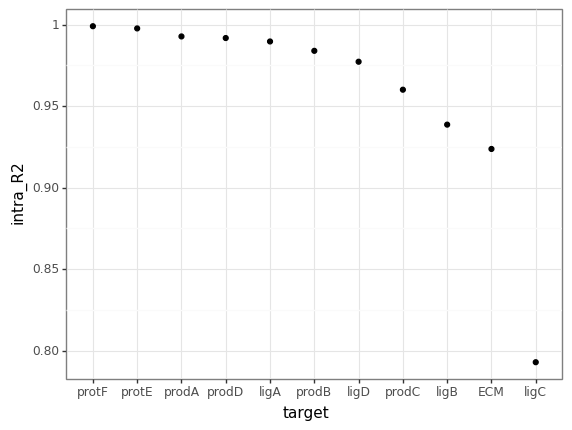

<ggplot: (8761725980246)>

In [9]:
plot_Rsq(misty, 'intra_R2', return_fig=True)

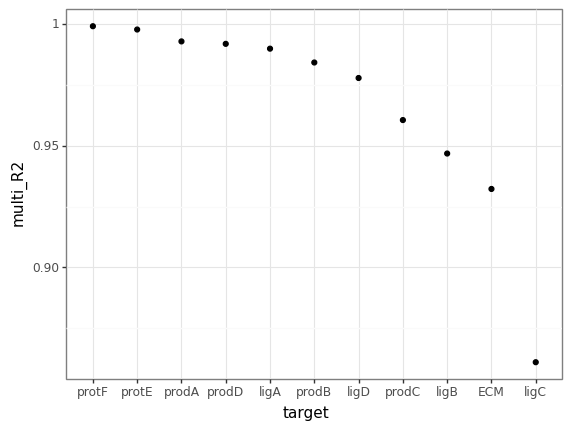

<ggplot: (8761725470648)>

In [10]:
plot_Rsq(misty, stat='multi_R2')

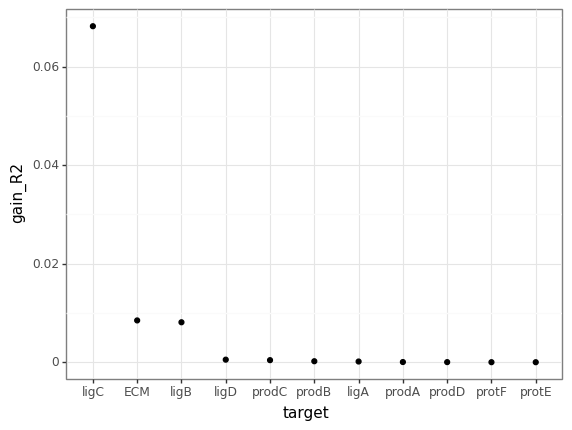

<ggplot: (8761699321580)>

In [11]:
plot_Rsq(misty, stat="gain_R2")


In [12]:
def plot_contribution(misty, figure_size=(7, 5), return_fig=True):
    contributions = misty.uns['target_metrics'].copy()
    contributions = contributions[['target', *misty.view_names]]
    contributions = contributions.melt(id_vars='target', var_name='view', value_name='contribution')
    
    ## stacked barplot of contributions
    p = (p9.ggplot(contributions, p9.aes(x='target', y='contribution', fill='view')) +
         p9.geom_bar(stat='identity') +
         p9.theme_bw(base_size=14) +
        p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=1),
        figure_size=figure_size) +
         p9.scale_fill_brewer(palette=2, type='qual')
    )
    
    if return_fig:
        return p
    p.draw()

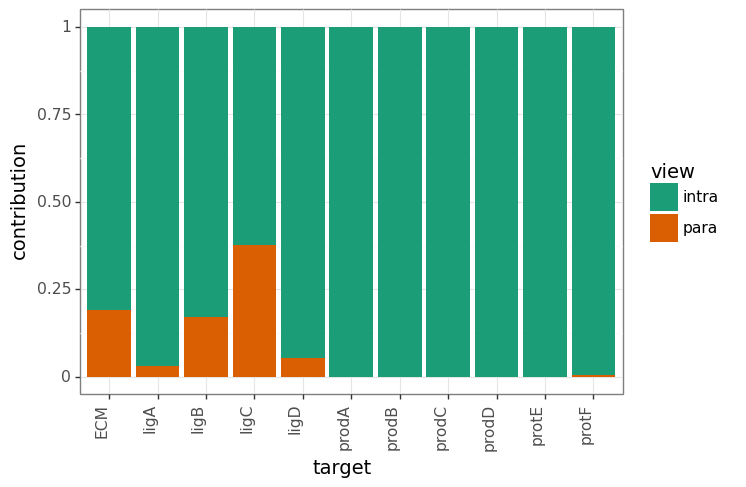

<ggplot: (8761699325397)>

In [13]:
plot_contribution(misty, return_fig=True)

In [14]:
misty.uns['importances']

,target,predictor,intra_group,extra_group,view,value
0,ECM,ligA,None,None,intra,0.007298
1,ECM,ligB,None,None,intra,0.023912
2,ECM,ligC,None,None,intra,0.059893
3,ECM,ligD,None,None,intra,0.010323
4,ECM,protE,None,None,intra,0.371159
...,...,...,...,...,...,...
215,prodD,protE,None,None,para,0.095544
216,prodD,protF,None,None,para,0.094145
217,prodD,prodA,None,None,para,0.194828
218,prodD,prodB,None,None,para,0.065790


In [15]:
del misty.uns

In [16]:
misty.uns = {}

In [35]:
misty.uns['importances'].drop(columns=['intra_group', 'extra_group'], inplace=True)

In [38]:
misty.uns['target_metrics']

,target,intra_group,env_group,intra_R2,multi_R2,gain_R2,intra,para
0,ECM,None,None,0.923776,0.932255,8.479020e-03,0.809283,0.190717
1,ligA,None,None,0.989752,0.989890,1.387876e-04,0.969908,0.030092
2,ligB,None,None,0.938705,0.946808,8.103526e-03,0.827781,0.172219
3,ligC,None,None,0.792883,0.861073,6.818968e-02,0.622022,0.377978
4,ligD,None,None,0.977320,0.977836,5.164163e-04,0.946948,0.053052
5,protE,None,None,0.997760,0.997757,-2.465470e-06,1.000000,0.000000
6,protF,None,None,0.999113,0.999114,6.834885e-07,0.994865,0.005135
7,prodA,None,None,0.992840,0.992873,3.348619e-05,1.000000,0.000000
8,prodB,None,None,0.984011,0.984206,1.952714e-04,1.000000,0.000000
9,prodC,None,None,0.960142,0.960558,4.162583e-04,1.000000,0.000000


In [39]:
misty.uns['target_metrics'].drop(columns=['intra_group', 'env_group'], inplace=True)

In [40]:
misty.write_h5mu("misty.h5mu")

/home/dbdimitrov/anaconda3/envs/liana-py/lib/python3.10/site-packages/mudata/_core/mudata.py:457: UserWarning: Cannot join columns with the same name because var_names are intersecting.


In [41]:
import mudata as mu

In [42]:
mu.read_h5mu("misty.h5mu")

/home/dbdimitrov/anaconda3/envs/liana-py/lib/python3.10/site-packages/mudata/_core/mudata.py:457: UserWarning: Cannot join columns with the same name because var_names are intersecting.


MuData object with n_obs × n_vars = 4205 × 22
  obs:	'cell_type'
  uns:	'importances', 'target_metrics'
  2 modalities
    intra:	4205 x 11
      obs:	'cell_type'
      obsm:	'spatial'
    para:	4205 x 11
      obsm:	'spatial'
      obsp:	'spatial_connectivities'